#Pre processing

In [ ]:
import pandas as pd

# Load an Excel file into a DataFrame
df = pd.read_excel('/content/DataSet.xlsx', sheet_name='Sheet1')

df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
clean_df = df.dropna(subset=['MEDV'])
clean_df['CHAS'] = clean_df['CHAS'].apply(lambda x: x * 0 if x < 0.5 else x / x)

<ipython-input-3-98deafdec795>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['CHAS'] = clean_df['CHAS'].apply(lambda x: x * 0 if x < 0.5 else x / x)


In [ ]:
clean_df['CHAS'].unique()

array([0., 1.])

In [ ]:
min_value = clean_df['MEDV'].min()
max_value = clean_df['MEDV'].max()

# Calculate range
value_range = max_value - min_value
print(f'{min_value} {max_value} {value_range}')

6.3 50.0 43.7


In [ ]:
clean_df['value'] = clean_df['MEDV'].apply(lambda x: 'high' if x > 35.0 else ('medium' if x >= 20.0 and x <=35  else 'low'))
clean_df

<ipython-input-6-573270ff6958>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['value'] = clean_df['MEDV'].apply(lambda x: 'high' if x > 35.0 else ('medium' if x >= 20.0 and x <=35  else 'low'))


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,medium
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,medium
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,medium
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,medium
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,medium
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,medium
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,medium
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,medium


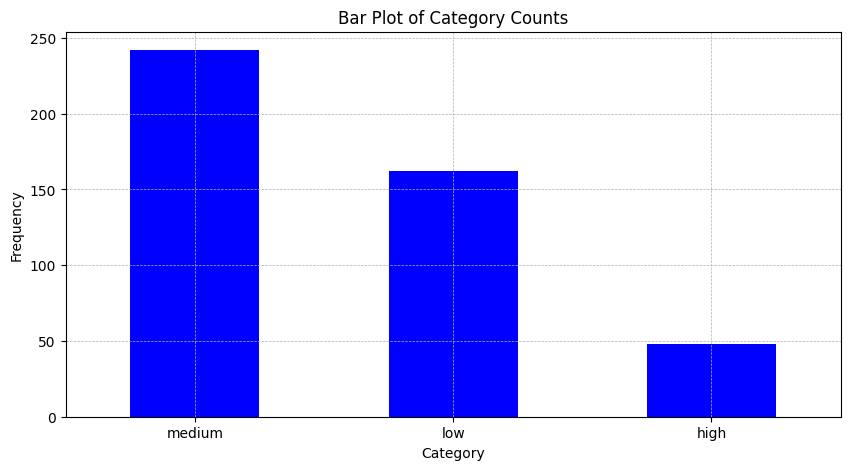

In [ ]:
import matplotlib.pyplot as plt

category_counts = clean_df['value'].value_counts()

category_counts.plot(kind='bar', color='blue', figsize=(10, 5))
plt.title('Bar Plot of Category Counts')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Keep the category labels horizontal for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
clean_df['value_one_hot'] = clean_df['MEDV'].apply(lambda x: 2 if x > 35.0 else (1 if x >= 20.0 and x <=35  else 0))
clean_df

<ipython-input-8-f7aed94d61e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['value_one_hot'] = clean_df['MEDV'].apply(lambda x: 2 if x > 35.0 else (1 if x >= 20.0 and x <=35  else 0))


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,value,value_one_hot
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,medium,1
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,medium,1
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,medium,1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,medium,1
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,high,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,medium,1
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,medium,1
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,medium,1
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,medium,1


In [ ]:

medium , low, high = clean_df['value'].value_counts(normalize=True) * 100

print(f'Percentage of target value hight: {high:.2f}%')
print(f'Percentage of target value medium: {medium:.2f}%')
print(f'Percentage of target value low: {low:.2f}%')

Percentage of target value hight: 10.62%
Percentage of target value medium: 53.54%
Percentage of target value low: 35.84%


In [ ]:
clean_df.columns[:-3]

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

#SVM

In [ ]:
from sklearn.model_selection import train_test_split

X = clean_df[clean_df.columns[:-3]]  # or df.drop('target_column', axis=1) if many columns
y = clean_df['value_one_hot']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 ,  stratify=y )

In [ ]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
280,0.03578,20.0,3.33,0.0,0.4429,7.820,64.5,4.6947,5,216.0,14.9,387.31,3.76
189,0.08370,45.0,3.44,0.0,0.4370,7.185,38.9,4.5667,5,398.0,15.2,396.90,5.39
110,0.10793,0.0,8.56,0.0,0.5200,6.195,54.4,2.7778,5,384.0,20.9,393.49,13.00
368,4.89822,0.0,18.10,0.0,0.6310,4.970,100.0,1.3325,24,666.0,20.2,375.52,3.26
5,0.02985,0.0,2.18,0.0,0.4580,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,4.83567,0.0,18.10,0.0,0.5830,5.905,53.2,3.1523,24,666.0,20.2,388.22,11.45
65,0.03584,80.0,3.37,0.0,0.3980,6.290,17.8,6.6115,4,337.0,16.1,396.90,4.67
496,0.28960,0.0,9.69,0.0,0.5850,5.390,72.9,2.7986,6,391.0,19.2,396.90,21.14
341,0.01301,35.0,1.52,0.0,0.4420,7.241,49.3,7.0379,1,284.0,15.5,394.74,5.49


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')  # You can adjust C and gamma as needed
svm_rbf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rbf = svm_rbf.predict(X_test)

# Evaluate accuracy
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f'Accuracy with RBF kernel: {accuracy_rbf:.2%}')

# Train SVM with linear kernel
svm_linear = SVC(kernel='linear', C=1.0)  # You can adjust C as needed
svm_linear.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = svm_linear.predict(X_test)

# Evaluate accuracy
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f'Accuracy with linear kernel: {accuracy_linear:.2%}')

Accuracy with RBF kernel: 83.52%
Accuracy with linear kernel: 80.22%


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define parameter grids for grid search
param_grid = {
    'C': [1,10 ,100,10000000],
    'gamma': [0.001, 0.01, 0.1 , 1],
}

# Create an SVM model with RBF kernel
svm_rbf = SVC(kernel='rbf')

# Perform grid search
grid_search = GridSearchCV(svm_rbf, param_grid, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Grid Search - Best Parameters:", grid_search.best_params_)
print("Grid Search - Best Accuracy: {:.2%}".format(grid_search.best_score_))

# Define parameter distributions for randomized search
param_dist = {
    'C': uniform(0.1, 10),    # Random values from a uniform distribution in the range [0.1, 2.1)
    'gamma': uniform(0.0001, 0.1),  # Random values from a uniform distribution in the range [0.01, 2.01)
}

# Perform randomized search
random_search = RandomizedSearchCV(svm_rbf, param_distributions=param_dist, n_iter=10, scoring='accuracy', random_state=101)
random_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("\nRandomized Search - Best Parameters in random search:", random_search.best_params_)
print("Randomized Search - Best Accuracy random search: {:.2%}".format(random_search.best_score_))

# Evaluate the best models on the test set
y_pred_grid = grid_search.best_estimator_.predict(X_test)
accuracy_grid = accuracy_score(y_test, y_pred_grid)
print("\nGrid Search - Test Accuracy: {:.2%}".format(accuracy_grid))

y_pred_random = random_search.best_estimator_.predict(X_test)
accuracy_random = accuracy_score(y_test, y_pred_random)
print("Randomized Search - Test Accuracy: {:.2%}".format(accuracy_random))

Grid Search - Best Parameters: {'C': 100, 'gamma': 0.01}
Grid Search - Best Accuracy: 82.82%

Randomized Search - Best Parameters in random search: {'C': 7.315438617683046, 'gamma': 0.01909389542047968}
Randomized Search - Best Accuracy random search: 83.11%

Grid Search - Test Accuracy: 84.62%
Randomized Search - Test Accuracy: 84.62%



Grid Search Search - Best Model Test Accuracy: 84.62%

Confusion Matrix for the Best Model:
[[29  3  0]
 [ 2 45  2]
 [ 0  7  3]]


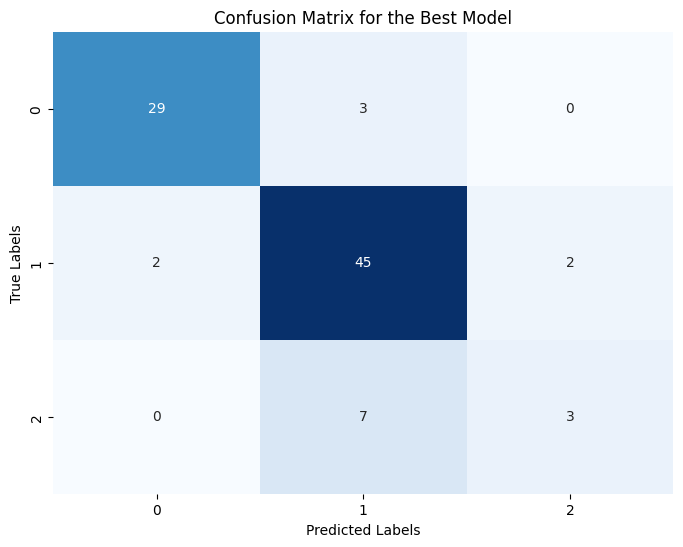

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate accuracy on the test set
accuracy_best = accuracy_score(y_test, y_pred_best)
print("\nGrid Search Search - Best Model Test Accuracy: {:.2%}".format(accuracy_best))

# Generate and print the confusion matrix
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
print("\nConfusion Matrix for the Best Model:")
print(conf_matrix_best)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for the Best Model')
plt.show()

##ِDesion Tree


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the KNN classifier
dt_classifier = DecisionTreeClassifier(max_depth=7)  # You can change the number of neighbors

# Train the classifier
dt_classifier.fit(X_train, y_train)



# Make predictions on the test set
predictions_test_data = dt_classifier.predict(X_test)
predictions_train_data = dt_classifier.predict(X_train)
# Calculate accuracy
accuracy_test_data = accuracy_score(y_test, predictions_test_data)
accuracy_train_data = accuracy_score(y_train, predictions_train_data)
print(f"Accuracy Test Data: {accuracy_test_data * 100:.2f}%")
print(f"Accuracy Train-Data: {accuracy_train_data * 100:.2f}%")
# Confusion Matrix
conf_matrix_test_data = confusion_matrix(y_test, predictions_test_data)
print("\nConfusion Matrix: test-data")
print(conf_matrix_test_data)

conf_matrix_train_data = confusion_matrix(y_train, predictions_train_data)
print("\nConfusion Matrix: train-data")
print(conf_matrix_train_data)

# Classification Report
class_report_test_data = classification_report(y_test, predictions_test_data)
print("\nClassification Report X-test:")
print(class_report_test_data)

class_report_train_data = classification_report(y_train, predictions_train_data)
print("\nClassification Report X-train:")
print(class_report_train_data)

Accuracy Test Data: 80.22%
Accuracy Train-Data: 93.91%

Confusion Matrix: test-data
[[26  6  0]
 [ 5 44  0]
 [ 0  7  3]]

Confusion Matrix: train-data
[[119  11   0]
 [  4 189   0]
 [  0   7  31]]

Classification Report X-test:
              precision    recall  f1-score   support

           0       0.84      0.81      0.83        32
           1       0.77      0.90      0.83        49
           2       1.00      0.30      0.46        10

    accuracy                           0.80        91
   macro avg       0.87      0.67      0.71        91
weighted avg       0.82      0.80      0.79        91


Classification Report X-train:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       130
           1       0.91      0.98      0.95       193
           2       1.00      0.82      0.90        38

    accuracy                           0.94       361
   macro avg       0.96      0.90      0.93       361
weighted avg       0.94      0.94

Accuracy Test Data: 76.92%
Accuracy Train-Data: 73.13%
Accuracy Test Data: 76.92%
Accuracy Train-Data: 84.76%
Accuracy Test Data: 80.22%
Accuracy Train-Data: 89.20%
Accuracy Test Data: 80.22%
Accuracy Train-Data: 93.91%
Accuracy Test Data: 78.02%
Accuracy Train-Data: 98.34%


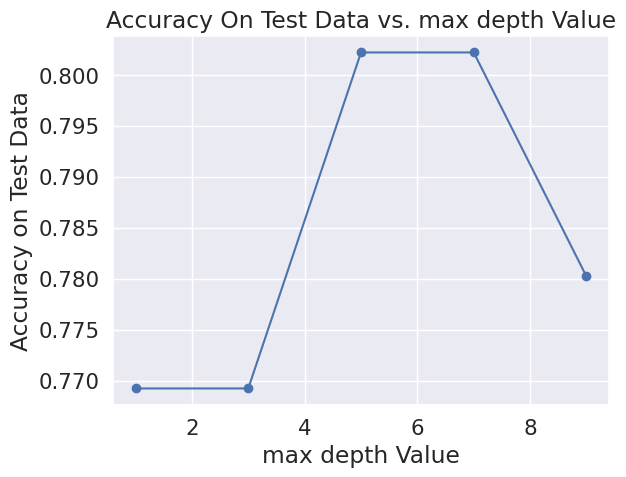

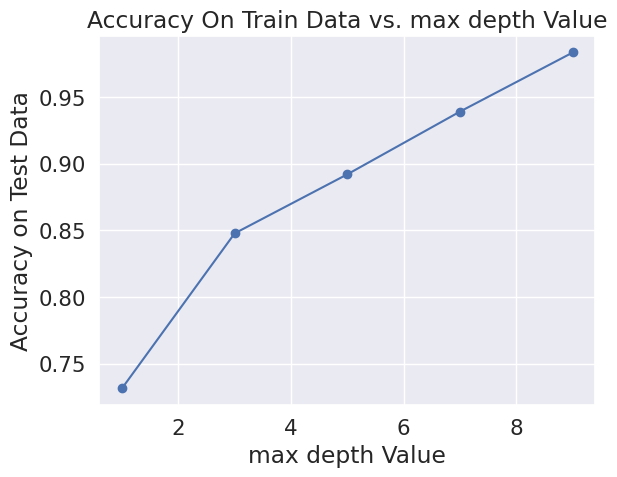

The best k based on accuracy is on test-data: 5 and the Accuracy is :80.21978021978022
The best k based on accuracy is on train-data: 9 and the Accuracy is :98.33795013850416


In [27]:
import numpy as np
from sklearn.metrics import accuracy_score

# Try different values of k and store the accuracy
max_depthes = [1,3,5,7,9]
accuracies_test_data_list = []
accuracies_train_data_list  =[]
for md in max_depthes:
    # Create and fit the KNN classifier
    dt_classifier = DecisionTreeClassifier(max_depth=md)
    dt_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    predictions_test_data = dt_classifier.predict(X_test)
    predictions_train_data = dt_classifier.predict(X_train)
    # Calculate accuracy
    accuracy_test_data = accuracy_score(y_test, predictions_test_data)
    accuracy_train_data = accuracy_score(y_train, predictions_train_data)
    accuracies_test_data_list.append(accuracy_test_data)
    accuracies_train_data_list.append(accuracy_train_data)
    print(f"Accuracy Test Data: {accuracy_test_data * 100:.2f}%")
    print(f"Accuracy Train-Data: {accuracy_train_data * 100:.2f}%")
    # Confusion Matrix
    conf_matrix_test_data = confusion_matrix(y_test, predictions_test_data)
    # print("\nConfusion Matrix: test-data")
    # print(conf_matrix_test_data)

    # conf_matrix_train_data = confusion_matrix(y_train, predictions_train_data)
    # print("\nConfusion Matrix: train-data")
    # print(conf_matrix_train_data)

    # # Classification Report
    # class_report_test_data = classification_report(y_test, predictions_test_data)
    # print("\nClassification Report X-test:")
    # print(class_report_test_data)

    # class_report_train_data = classification_report(y_train, predictions_train_data)
    # print("\nClassification Report X-train:")
    # print(class_report_train_data)
    # print("____________________________________________________")


# Plot the accuracy chart
plt.plot(max_depthes, accuracies_test_data_list, marker='o')
plt.title('Accuracy On Test Data vs. max depth Value')
plt.xlabel('max depth Value')
plt.ylabel('Accuracy on Test Data')
plt.show()

plt.plot(max_depthes, accuracies_train_data_list, marker='o')
plt.title('Accuracy On Train Data vs. max depth Value')
plt.xlabel('max depth Value')
plt.ylabel('Accuracy on Test Data')
plt.show()
#
#
# Report the best k based on the highest accuracy
best_k_test_data = max_depthes[np.argmax(accuracies_test_data_list)]
print(f"The best k based on accuracy is on test-data: {best_k_test_data} and the Accuracy is :{np.max(accuracies_test_data_list) * 100}")

# Report the best k based on the highest accuracy
best_k_train_data = max_depthes[np.argmax(accuracies_train_data_list)]
print(f"The best k based on accuracy is on train-data: {best_k_train_data} and the Accuracy is :{np.max(accuracies_train_data_list) * 100}")

Accuracy Test Data: 78.02%
Accuracy Train-Data: 100.00%
Accuracy Test Data: 78.02%
Accuracy Train-Data: 98.89%
Accuracy Test Data: 76.92%
Accuracy Train-Data: 97.23%
Accuracy Test Data: 76.92%
Accuracy Train-Data: 96.68%
Accuracy Test Data: 75.82%
Accuracy Train-Data: 95.01%


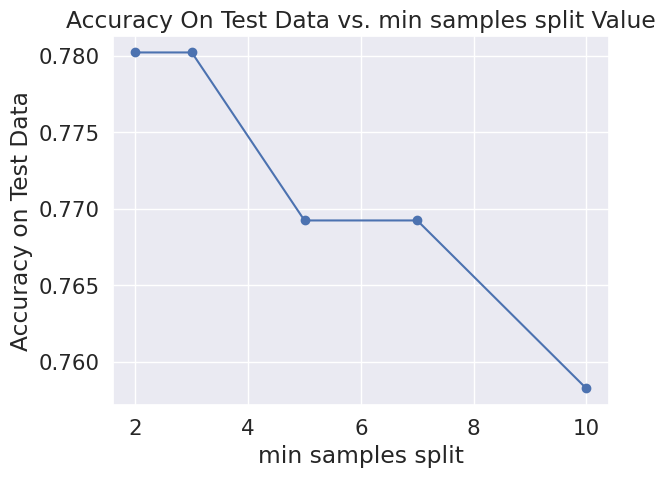

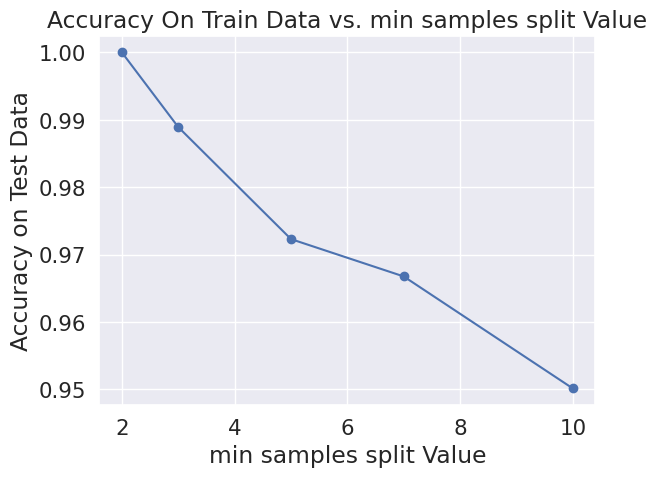

The best k based on accuracy is on test-data: 2 and the Accuracy is :78.02197802197803
The best k based on accuracy is on train-data: 2 and the Accuracy is :100.0


In [39]:
import numpy as np
from sklearn.metrics import accuracy_score

# Try different values of k and store the accuracy
min_samples_split= [2,3,5,7,10]

accuracies_test_data_list = []
accuracies_train_data_list  =[]
for ms in min_samples_split :
    # Create and fit the KNN classifier
    dt_classifier = DecisionTreeClassifier(min_samples_split=ms)
    dt_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    predictions_test_data = dt_classifier.predict(X_test)
    predictions_train_data = dt_classifier.predict(X_train)
    # Calculate accuracy
    accuracy_test_data = accuracy_score(y_test, predictions_test_data)
    accuracy_train_data = accuracy_score(y_train, predictions_train_data)
    accuracies_test_data_list.append(accuracy_test_data)
    accuracies_train_data_list.append(accuracy_train_data)
    print(f"Accuracy Test Data: {accuracy_test_data * 100:.2f}%")
    print(f"Accuracy Train-Data: {accuracy_train_data * 100:.2f}%")
    # Confusion Matrix
    conf_matrix_test_data = confusion_matrix(y_test, predictions_test_data)
    # print("\nConfusion Matrix: test-data")
    # print(conf_matrix_test_data)

    # conf_matrix_train_data = confusion_matrix(y_train, predictions_train_data)
    # print("\nConfusion Matrix: train-data")
    # print(conf_matrix_train_data)

    # # Classification Report
    # class_report_test_data = classification_report(y_test, predictions_test_data)
    # print("\nClassification Report X-test:")
    # print(class_report_test_data)

    # class_report_train_data = classification_report(y_train, predictions_train_data)
    # print("\nClassification Report X-train:")
    # print(class_report_train_data)
    # print("____________________________________________________")


# Plot the accuracy chart
plt.plot(min_samples_split, accuracies_test_data_list, marker='o')
plt.title('Accuracy On Test Data vs. min samples split Value')
plt.xlabel('min samples split')
plt.ylabel('Accuracy on Test Data')
plt.show()

plt.plot(min_samples_split, accuracies_train_data_list, marker='o')
plt.title('Accuracy On Train Data vs. min samples split Value')
plt.xlabel('min samples split Value')
plt.ylabel('Accuracy on Test Data')
plt.show()
#
#
# Report the best k based on the highest accuracy
best_k_test_data = min_samples_split[np.argmax(accuracies_test_data_list)]
print(f"The best k based on accuracy is on test-data: {best_k_test_data} and the Accuracy is :{np.max(accuracies_test_data_list) * 100}")

# Report the best k based on the highest accuracy
best_k_train_data = min_samples_split[np.argmax(accuracies_train_data_list)]
print(f"The best k based on accuracy is on train-data: {best_k_train_data} and the Accuracy is :{np.max(accuracies_train_data_list) * 100}")

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)  # You can change the number of neighbors

# Train the classifier
knn_classifier.fit(X_train, y_train)



# Make predictions on the test set
predictions_test_data = knn_classifier.predict(X_test)
predictions_train_data = knn_classifier.predict(X_train)
# Calculate accuracy
accuracy_test_data = accuracy_score(y_test, predictions_test_data)
accuracy_train_data = accuracy_score(y_train, predictions_train_data)
print(f"Accuracy Test Data: {accuracy_test_data * 100:.2f}%")
print(f"Accuracy Train-Data: {accuracy_train_data * 100:.2f}%")
# Confusion Matrix
conf_matrix_test_data = confusion_matrix(y_test, predictions_test_data)
print("\nConfusion Matrix: test-data")
print(conf_matrix_test_data)

conf_matrix_train_data = confusion_matrix(y_train, predictions_train_data)
print("\nConfusion Matrix: train-data")
print(conf_matrix_train_data)

# Classification Report
class_report_test_data = classification_report(y_test, predictions_test_data)
print("\nClassification Report X-test:")
print(class_report_test_data)

class_report_train_data = classification_report(y_train, predictions_train_data)
print("\nClassification Report X-train:")
print(class_report_train_data)


Accuracy Test Data: 82.42%
Accuracy Train-Data: 90.58%

Confusion Matrix: test-data
[[28  4  0]
 [ 3 45  1]
 [ 0  8  2]]

Confusion Matrix: train-data
[[116  14   0]
 [  9 183   1]
 [  1   9  28]]

Classification Report X-test:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        32
           1       0.79      0.92      0.85        49
           2       0.67      0.20      0.31        10

    accuracy                           0.82        91
   macro avg       0.79      0.66      0.68        91
weighted avg       0.82      0.82      0.80        91


Classification Report X-train:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       130
           1       0.89      0.95      0.92       193
           2       0.97      0.74      0.84        38

    accuracy                           0.91       361
   macro avg       0.92      0.86      0.89       361
weighted avg       0.91      0.91

Accuracy Test Data: 81.32%
Accuracy Train-Data: 100.00%
Accuracy Test Data: 78.02%
Accuracy Train-Data: 87.81%
Accuracy Test Data: 82.42%
Accuracy Train-Data: 90.58%
Accuracy Test Data: 75.82%
Accuracy Train-Data: 87.81%
Accuracy Test Data: 73.63%
Accuracy Train-Data: 86.43%
Accuracy Test Data: 75.82%
Accuracy Train-Data: 84.76%
Accuracy Test Data: 76.92%
Accuracy Train-Data: 84.49%
Accuracy Test Data: 76.92%
Accuracy Train-Data: 83.93%
Accuracy Test Data: 75.82%
Accuracy Train-Data: 83.93%
Accuracy Test Data: 81.32%
Accuracy Train-Data: 81.99%


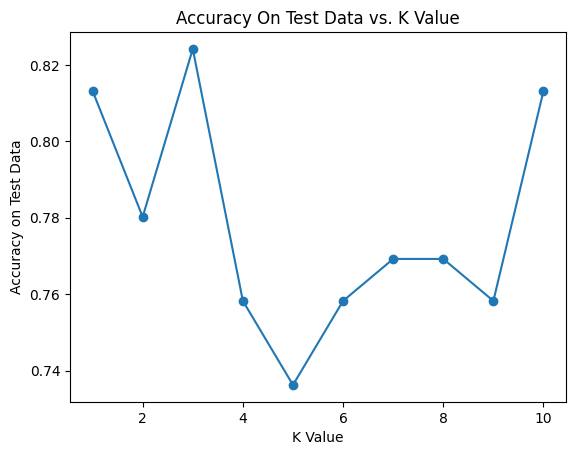

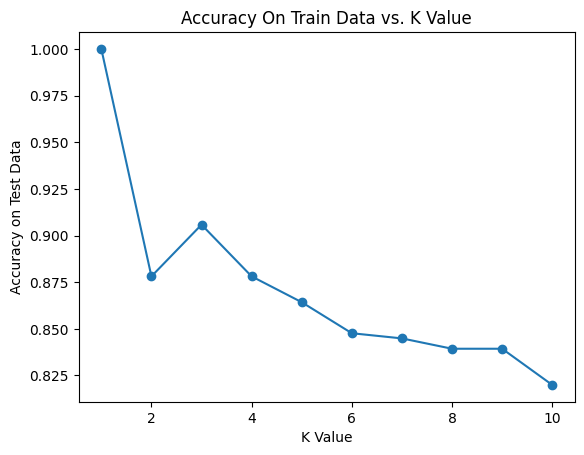

The best k based on accuracy is on test-data: 3 and the Accuracy is :82.41758241758241
The best k based on accuracy is on train-data: 1 and the Accuracy is :100.0


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

# Try different values of k and store the accuracy
k_values = list(range(1, 11))
accuracies_test_data_list = []
accuracies_train_data_list  =[]
for k in k_values:
    # Create and fit the KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    predictions_test_data = knn_classifier.predict(X_test)
    predictions_train_data = knn_classifier.predict(X_train)
    # Calculate accuracy
    accuracy_test_data = accuracy_score(y_test, predictions_test_data)
    accuracy_train_data = accuracy_score(y_train, predictions_train_data)
    accuracies_test_data_list.append(accuracy_test_data)
    accuracies_train_data_list.append(accuracy_train_data)
    print(f"Accuracy Test Data: {accuracy_test_data * 100:.2f}%")
    print(f"Accuracy Train-Data: {accuracy_train_data * 100:.2f}%")
    # Confusion Matrix
    conf_matrix_test_data = confusion_matrix(y_test, predictions_test_data)
    # print("\nConfusion Matrix: test-data")
    # print(conf_matrix_test_data)

    # conf_matrix_train_data = confusion_matrix(y_train, predictions_train_data)
    # print("\nConfusion Matrix: train-data")
    # print(conf_matrix_train_data)

    # # Classification Report
    # class_report_test_data = classification_report(y_test, predictions_test_data)
    # print("\nClassification Report X-test:")
    # print(class_report_test_data)

    # class_report_train_data = classification_report(y_train, predictions_train_data)
    # print("\nClassification Report X-train:")
    # print(class_report_train_data)
    # print("____________________________________________________")


# Plot the accuracy chart
plt.plot(k_values, accuracies_test_data_list, marker='o')
plt.title('Accuracy On Test Data vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy on Test Data')
plt.savefig('test-data.png')
plt.show()

plt.plot(k_values, accuracies_train_data_list, marker='o')
plt.title('Accuracy On Train Data vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy on Test Data')
plt.savefig('train-data.png')
plt.show()
#
#
# Report the best k based on the highest accuracy
best_k_test_data = k_values[np.argmax(accuracies_test_data_list)]
print(f"The best k based on accuracy is on test-data: {best_k_test_data} and the Accuracy is :{np.max(accuracies_test_data_list) * 100}")

# Report the best k based on the highest accuracy
best_k_train_data = k_values[np.argmax(accuracies_train_data_list)]
print(f"The best k based on accuracy is on train-data: {best_k_train_data} and the Accuracy is :{np.max(accuracies_train_data_list) * 100}")


##Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the KNN classifier
rf_classifier = RandomForestClassifier()  # You can change the number of neighbors

# Train the classifier
rf_classifier.fit(X_train, y_train)



# Make predictions on the test set
predictions_test_data = rf_classifier.predict(X_test)
predictions_train_data = rf_classifier.predict(X_train)
# Calculate accuracy
accuracy_test_data = accuracy_score(y_test, predictions_test_data)
accuracy_train_data = accuracy_score(y_train, predictions_train_data)
print(f"Accuracy Test Data: {accuracy_test_data * 100:.2f}%")
print(f"Accuracy Train-Data: {accuracy_train_data * 100:.2f}%")
# Confusion Matrix
conf_matrix_test_data = confusion_matrix(y_test, predictions_test_data)
print("\nConfusion Matrix: test-data")
print(conf_matrix_test_data)

conf_matrix_train_data = confusion_matrix(y_train, predictions_train_data)
print("\nConfusion Matrix: train-data")
print(conf_matrix_train_data)

# Classification Report
class_report_test_data = classification_report(y_test, predictions_test_data)
print("\nClassification Report X-test:")
print(class_report_test_data)

class_report_train_data = classification_report(y_train, predictions_train_data)
print("\nClassification Report X-train:")
print(class_report_train_data)

Accuracy Test Data: 83.52%
Accuracy Train-Data: 100.00%

Confusion Matrix: test-data
[[27  5  0]
 [ 3 45  1]
 [ 0  6  4]]

Confusion Matrix: train-data
[[130   0   0]
 [  0 193   0]
 [  0   0  38]]

Classification Report X-test:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        32
           1       0.80      0.92      0.86        49
           2       0.80      0.40      0.53        10

    accuracy                           0.84        91
   macro avg       0.83      0.72      0.75        91
weighted avg       0.84      0.84      0.83        91


Classification Report X-train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00       193
           2       1.00      1.00      1.00        38

    accuracy                           1.00       361
   macro avg       1.00      1.00      1.00       361
weighted avg       1.00      1.0

Accuracy Test Data: 83.52%
Accuracy Train-Data: 99.72%
Accuracy Test Data: 84.62%
Accuracy Train-Data: 99.72%
Accuracy Test Data: 83.52%
Accuracy Train-Data: 99.72%
Accuracy Test Data: 82.42%
Accuracy Train-Data: 99.72%
Accuracy Test Data: 85.71%
Accuracy Train-Data: 99.72%


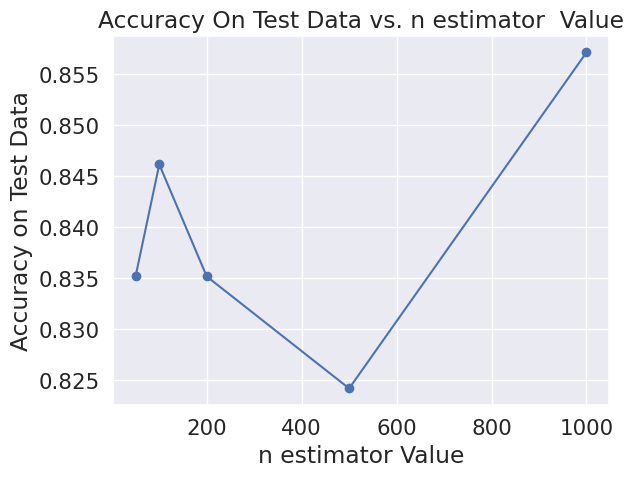

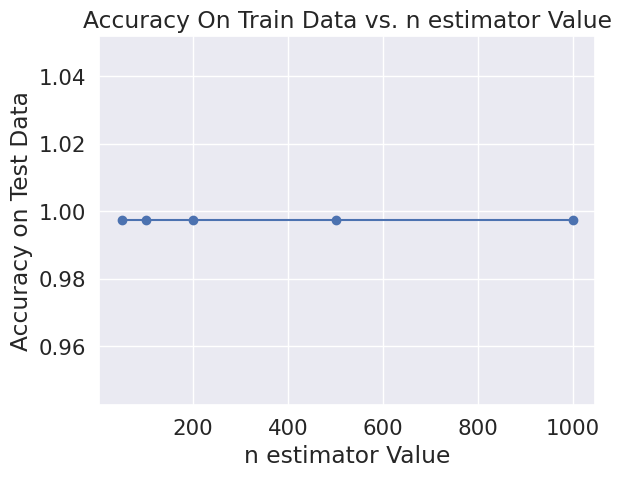

The best k based on accuracy is on test-data: 1000 and the Accuracy is :85.71428571428571
The best k based on accuracy is on train-data: 50 and the Accuracy is :99.7229916897507


In [38]:
import numpy as np
from sklearn.metrics import accuracy_score

# Try different values of k and store the accuracy
n_estims = [50,100,200,500,1000]
accuracies_test_data_list = []
accuracies_train_data_list  =[]
for ns in n_estims:
    # Create and fit the KNN classifier
    rf_classifier = RandomForestClassifier(max_depth=md)
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    predictions_test_data = rf_classifier.predict(X_test)
    predictions_train_data = rf_classifier.predict(X_train)
    # Calculate accuracy
    accuracy_test_data = accuracy_score(y_test, predictions_test_data)
    accuracy_train_data = accuracy_score(y_train, predictions_train_data)
    accuracies_test_data_list.append(accuracy_test_data)
    accuracies_train_data_list.append(accuracy_train_data)
    print(f"Accuracy Test Data: {accuracy_test_data * 100:.2f}%")
    print(f"Accuracy Train-Data: {accuracy_train_data * 100:.2f}%")
    # Confusion Matrix
    conf_matrix_test_data = confusion_matrix(y_test, predictions_test_data)
    # print("\nConfusion Matrix: test-data")
    # print(conf_matrix_test_data)

    # conf_matrix_train_data = confusion_matrix(y_train, predictions_train_data)
    # print("\nConfusion Matrix: train-data")
    # print(conf_matrix_train_data)

    # # Classification Report
    # class_report_test_data = classification_report(y_test, predictions_test_data)
    # print("\nClassification Report X-test:")
    # print(class_report_test_data)

    # class_report_train_data = classification_report(y_train, predictions_train_data)
    # print("\nClassification Report X-train:")
    # print(class_report_train_data)
    # print("____________________________________________________")


# Plot the accuracy chart
plt.plot(n_estims, accuracies_test_data_list, marker='o')
plt.title('Accuracy On Test Data vs. n estimator  Value')
plt.xlabel('n estimator Value')
plt.ylabel('Accuracy on Test Data')
plt.show()

plt.plot(n_estims, accuracies_train_data_list, marker='o')
plt.title('Accuracy On Train Data vs. n estimator Value')
plt.xlabel('n estimator Value')
plt.ylabel('Accuracy on Test Data')
plt.show()
#
#
# Report the best k based on the highest accuracy
best_k_test_data = n_estims[np.argmax(accuracies_test_data_list)]
print(f"The best k based on accuracy is on test-data: {best_k_test_data} and the Accuracy is :{np.max(accuracies_test_data_list) * 100}")

# Report the best k based on the highest accuracy
best_k_train_data = n_estims[np.argmax(accuracies_train_data_list)]
print(f"The best k based on accuracy is on train-data: {best_k_train_data} and the Accuracy is :{np.max(accuracies_train_data_list) * 100}")

#XGBOOST

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV



xgb = XGBClassifier( use_label_encoder=False,
    eval_metric='mlogloss',
    objective='multi:softmax',   # use softmax for multi-class classification
    num_class=3  )

param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
# len(y_train)
grid_search.fit(X_train, y_train)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best accuracy found: {grid_search.best_score_}")

best_estimator = grid_search.best_estimator_


Fitting 3 folds for each of 972 candidates, totalling 2916 fits
Best parameters found: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 1.0}
Best accuracy found: 0.8560376492194673


In [ ]:
XGB_preds = best_estimator.predict(X_test)

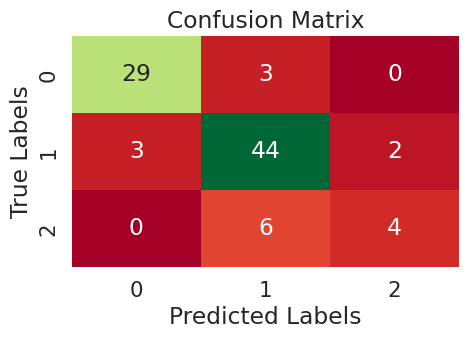

<Figure size 640x480 with 0 Axes>

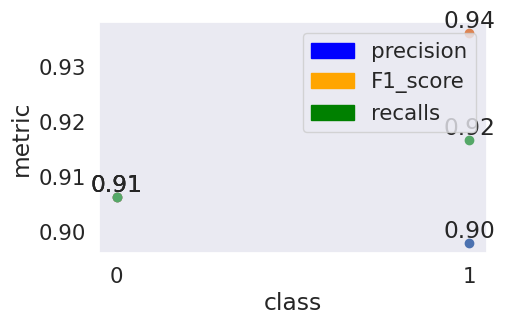

Precision: 0.91
Recall: 0.91
F1 Score: 0.91

micro average: 1.2032967032967035
weighted_average: 0.9114583333333333
macro average: 0.9114583333333333
accuract: 0.8021978021978022


In [ ]:
import seaborn as sns
import matplotlib.patches as mpatches

def scoring(cm):
    col_sum = [cm[0][i] + cm[1][i]  for i in range(2)]
    precision = [cm[i][i]/sum(cm[i]) for i in range(0,2)]
    recalls = [cm[i][i] / col_sum[i] for i in range(2)]
    F1_score = [(2*precision[i]*recalls[i])/ (precision[i] + recalls[i]) for i in range(2)]
    accuracy = sum(cm[i][i] for i in range(2))/sum(sum(cm))
    plt.clf()
    plt.figure(figsize=(5, 3))
    plt.scatter([0,1], precision)
    plt.scatter([0,1], recalls)
    plt.scatter([0,1], F1_score)
    plt.grid()
    plt.xlabel("class")
    plt.ylabel("metric")
    blue_patch = mpatches.Patch(color='blue',label='precision')
    orange_patch = mpatches.Patch(color='orange',label='F1_score')
    green_patch = mpatches.Patch(color='green',label='recalls')
    plt.legend(handles=[blue_patch,orange_patch,green_patch])

    # Adding the exact values on the plot
    for i in range(2):
        plt.text(i, precision[i], f'{precision[i]:.2f}', ha='center', va='bottom')
        plt.text(i, recalls[i], f'{recalls[i]:.2f}', ha='center', va='bottom')
        plt.text(i, F1_score[i], f'{F1_score[i]:.2f}', ha='center', va='bottom')
    plt.xticks([0, 1])
    plt.show()


    print(f"Precision: {precision[0]:.2f}")
    print(f"Recall: {recalls[0]:.2f}")
    print(f"F1 Score: {F1_score[0]:.2f}")
    print()

    weighted_average = sum(F1_score)/2
    micro_average = (sum(cm[i][i] for i in range(2)) / sum(sum(cm))) + (sum(cm[i][i] for i in range(2)) / sum(sum(cm))) / 2
    macro_average = sum(F1_score)/2
    print("micro average: " + str(micro_average))
    print("weighted_average: " + str(weighted_average))
    print("macro average: " + str(macro_average))
    print("accuract: " + str(accuracy))


def make_confusion_matrix(real_labels , pred_labels):
    cm = confusion_matrix(real_labels, pred_labels)
    # Create a heatmap
    sns.set(font_scale=1.4)
    plt.figure(figsize=(5, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap = "RdYlGn", cbar=False)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()
    return cm

XGB_cm = make_confusion_matrix(y_test , XGB_preds)
scoring(XGB_cm)

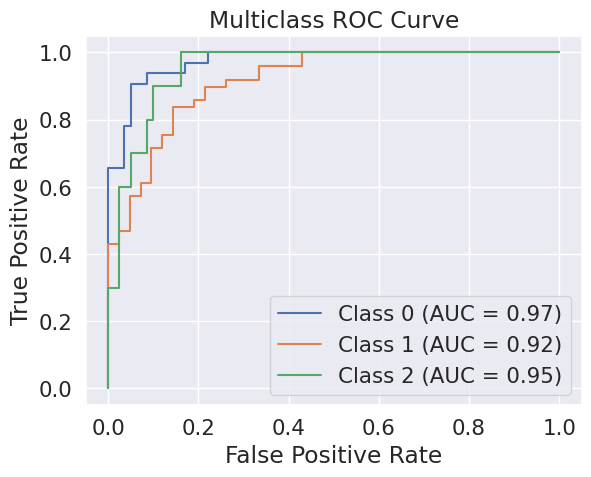

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import label_binarize
import numpy as np


y_score = best_estimator.predict_proba(X_test)
# Binarize the output
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]
# Compute ROC curve and ROC area for each class
fig, ax = plt.subplots()

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                    estimator_name=f'Class {i}').plot(ax=ax)

plt.title('Multiclass ROC Curve')
plt.show()
